In [1]:
import cv2
import albumentations as A
from albumentations.pytorch import ToTensorV2

import numpy as np
import matplotlib.pyplot as plt

C:\Users\danusys16\anaconda3\envs\yolov8\lib\site-packages\albumentations\__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
def show_img_mask(img, mask):
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis("off")
    plt.subplot(1,2,2)
    plt.imshow(mask)
    plt.axis("off")
    
    plt.show()
    

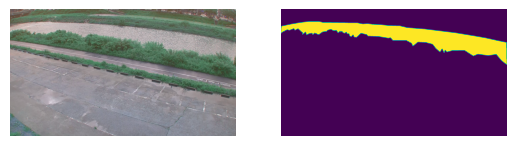

In [3]:
img0 = cv2.imread(r"D:\015_segmentation\datasets\AY_frames_241115\02_dataset_format\images\AY_12_15.jpg")
mask0 = cv2.imread(r"D:\015_segmentation\datasets\AY_frames_241115\02_dataset_format\masks\AY_12_15.png", cv2.IMREAD_GRAYSCALE)

show_img_mask(img0, mask0)

In [4]:
plt.close()

# Transform

## Random Darkness

In [101]:
darkness_transform = A.RandomBrightnessContrast(
    brightness_limit=(-0.5, -0.2),  # 밝기 감소 범위
    contrast_limit=0.1,  # 대비 조정 (옵션)
    p=0.5
)

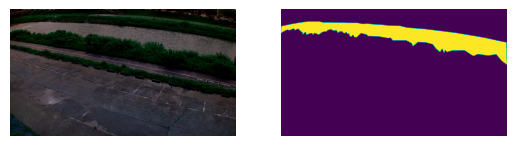

In [102]:
result=darkness_transform(image=img0, mask=mask0)
img1 = result["image"]
mask1 = result["mask"]

show_img_mask(img1, mask1)

##

In [10]:
noise_transform = A.GaussNoise(var_limit=(10.0, 50.0), 
                               p=0.5)


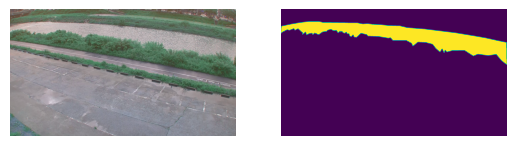

In [11]:
result=noise_transform(image=img0, mask=mask0)
img1 = result["image"]
mask1 = result["mask"]

show_img_mask(img1, mask1)

### Color Transform

In [139]:
night_color_transform = A.OneOf([
    A.HueSaturationValue(hue_shift_limit=0, 
                         sat_shift_limit=-30, 
                         val_shift_limit=-50, 
                         p=0.7),  # 어둡고 낮은 채도
    A.RGBShift(r_shift_limit=-20, 
               g_shift_limit=-20, 
               b_shift_limit=30, 
               p=0.3)  # 밤 색조
], p=1.0)

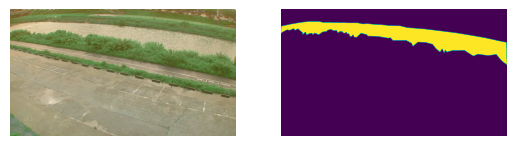

In [140]:
result=night_color_transform(image=img0, mask=mask0)
img1 = result["image"]
mask1 = result["mask"]

show_img_mask(img1, mask1)

## Contrast and Color Adjustment

In [26]:
contrast_transform = A.RandomBrightnessContrast(
    brightness_limit=(-0.4, 0.2), 
    contrast_limit=(-0.2, 0.2),
    p=0.7
)

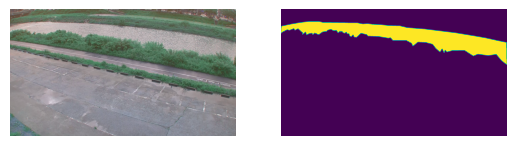

In [27]:
result=contrast_transform(image=img0, mask=mask0)
img1 = result["image"]
mask1 = result["mask"]

show_img_mask(img1, mask1)

## Combine

In [149]:
transform = A.Compose([
    #A.HorizontalFlip(p=0.5),  # 수평 뒤집기
    darkness_transform,       # 어둡게 하기
    noise_transform,          # 노이즈 추가
    #night_color_transform,    # 밤 색상 변환
    contrast_transform,       # 대비 및 색상 조정
    A.RandomShadow(p=0.5),
    A.RandomRotate90(p=1),
    A.RandomGridShuffle(p=0.5)
])

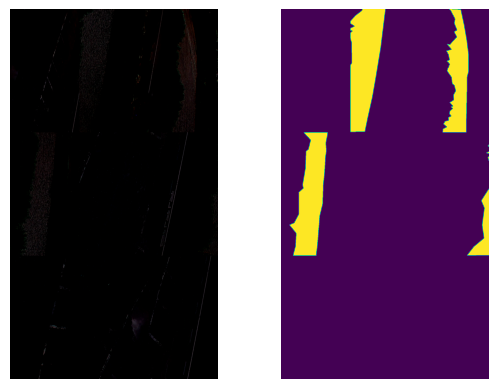

In [157]:
result=transform(image=img0, mask=mask0)
img1 = result["image"]
mask1 = result["mask"]

show_img_mask(img1, mask1)